## Watertank Level

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.formula.api import ols


In [17]:
data_fields = [
    "applicationID", "applicationName", "data_boardVoltage", "data_distance", 
    "devEUI", "fCnt", "fPort", "host", "nodeName", "rxInfo_altitude_0", 
    "rxInfo_altitude_1", "rxInfo_latitude_0", "rxInfo_latitude_1", 
    "rxInfo_loRaSNR_0", "rxInfo_loRaSNR_1", "rxInfo_longitude_0", 
    "rxInfo_longitude_1", "rxInfo_mac_0", "rxInfo_mac_1", "rxInfo_name_0", 
    "rxInfo_name_1", "rxInfo_rssi_0", "rxInfo_rssi_1", "time", "txInfo_adr", 
    "txInfo_codeRate", "txInfo_dataRate_bandwidth", "txInfo_dataRate_modulation", 
    "txInfo_dataRate_spreadFactor", "txInfo_frequency"
]

df_water_tank = pd.read_csv(r'data/WaterTankLevel.csv', header=3, usecols=data_fields)
df_water_tank["time"] = pd.to_datetime(df_water_tank["time"])
df_water_tank["data_distance"] /= 1000

In [18]:
dfs_water_tank_per_node = {app_id: df_node for app_id, df_node in df_water_tank.groupby("devEUI")}
ids = list(dfs_water_tank_per_node.keys())

In [19]:
RADIUS = 5
for id in ids:
    dfs_water_tank_per_node[id]["Volume"] = RADIUS**2 * np.pi * (dfs_water_tank_per_node[id]["data_distance"])
    dfs_water_tank_per_node[id]["time_diff"] = dfs_water_tank_per_node[id]["time"].diff().dt.seconds
    dfs_water_tank_per_node[id]["Vazao"] = dfs_water_tank_per_node[id]["Volume"].diff() / dfs_water_tank_per_node[id]["time_diff"]


In [20]:
data_volume = []
for id in ids:
    max_volume = dfs_water_tank_per_node[id]["Volume"].max()
    min_volume = dfs_water_tank_per_node[id]["Volume"].min()
    mean_volume = dfs_water_tank_per_node[id]["Volume"].mean()
    std_volume = dfs_water_tank_per_node[id]["Volume"].std()

    data_volume.append([id, max_volume, min_volume, mean_volume, std_volume])

df_estatisticas = pd.DataFrame(data_volume, columns=["Device ID", "Max Volume", "Min Volume", "Mean Volume", "Std Volume"])
df_estatisticas



,Device ID,Max Volume,Min Volume,Mean Volume,Std Volume
0,0004a30b00001001,319.264353,9.581858,142.798606,96.849168
1,0004a30b00001002,320.128291,3.063053,163.071987,88.344571
2,0004a30b00001003,321.620548,1.178097,147.510995,85.904084
3,0004a30b00001004,315.887141,1.021018,158.092874,89.099056
4,0004a30b00001005,320.599530,0.706858,167.599348,102.746373
5,0004a30b00001006,315.651522,1.413717,145.350250,95.254709
6,0004a30b00001007,320.835150,2.277655,170.582321,90.338331
7,0004a30b00001008,318.007716,4.241150,159.207138,87.466848


In [21]:
data_vazao = []
for id in ids:
    max_vazao = dfs_water_tank_per_node[id]["Vazao"].max()
    min_vazao = dfs_water_tank_per_node[id]["Vazao"].min()
    mean_vazao = dfs_water_tank_per_node[id]["Vazao"].mean()
    std_vazao = dfs_water_tank_per_node[id]["Vazao"].std()

    data_vazao.append([id, max_vazao, min_vazao, mean_vazao, std_vazao])

df_estatisticas_vazao = pd.DataFrame(data_vazao, columns=["Device ID", "Max Vazao", "Min Vazao", "Mean Vazao", "Std Vazao"])
df_estatisticas_vazao

,Device ID,Max Vazao,Min Vazao,Mean Vazao,Std Vazao
0,0004a30b00001001,39.718707,-42.736880,-0.384382,19.684445
1,0004a30b00001002,33.320517,-37.126893,-0.151231,15.460985
2,0004a30b00001003,36.397595,-36.117096,0.060630,15.791484
3,0004a30b00001004,37.160553,-38.271331,-0.092789,18.201760
4,0004a30b00001005,41.076324,-42.445161,-0.169022,18.427485
5,0004a30b00001006,37.396173,-42.220761,0.170605,17.318459
6,0004a30b00001007,41.368043,-37.306413,0.239785,17.158598
7,0004a30b00001008,34.748259,-34.066645,0.088968,17.736459


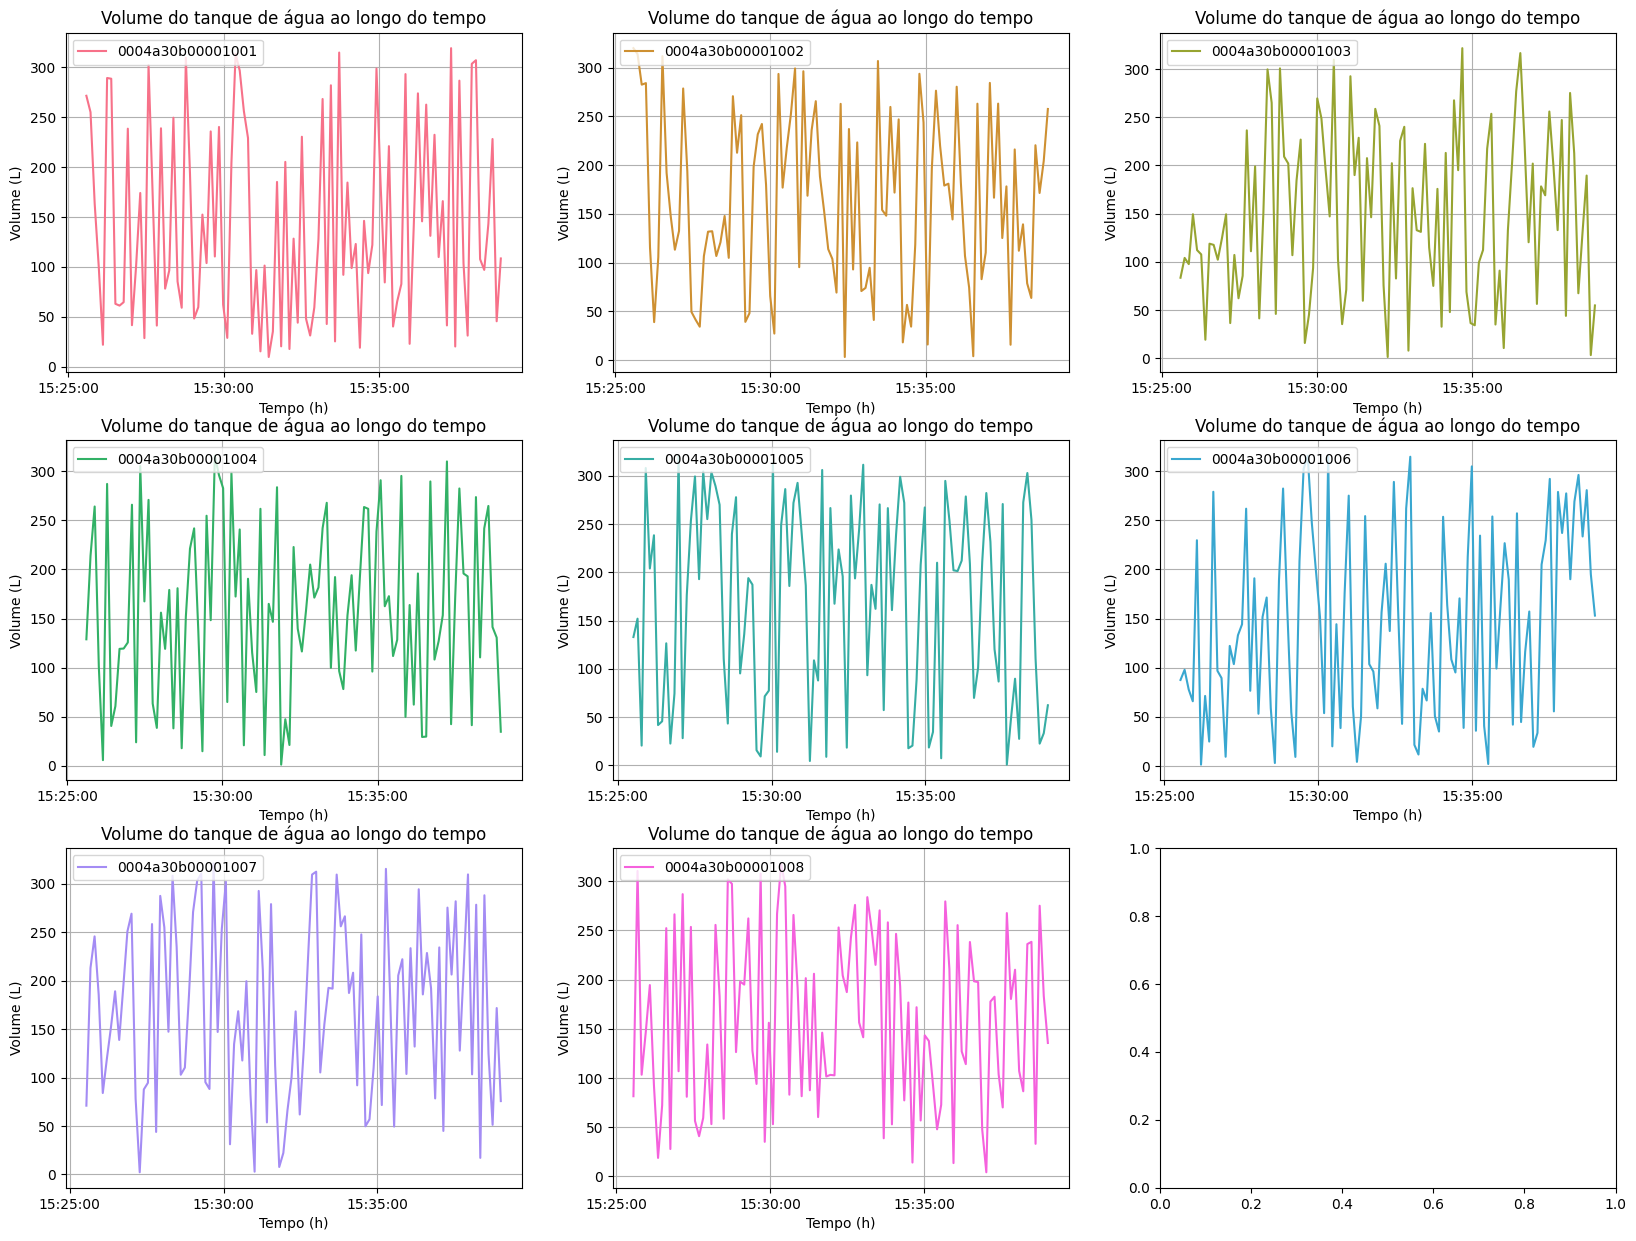

In [22]:
colors = sns.color_palette("husl", len(ids))

ncols = 3
nrows = (len(ids) + ncols - 1) // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, nrows*5))
axes = axes.flatten()
for ax, id in zip(axes,ids):
    df_water_tank_id = dfs_water_tank_per_node[id]
    sns.lineplot(ax=ax, x="time", y="Volume", data=df_water_tank_id, label=id, color=colors.pop(0))
    ax.set_xlabel("Tempo (h)")
    ax.set_ylabel("Volume (L)")
    ax.set_title("Volume do tanque de água ao longo do tempo") 
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.grid(True)
st.pyplot(plt.gcf())

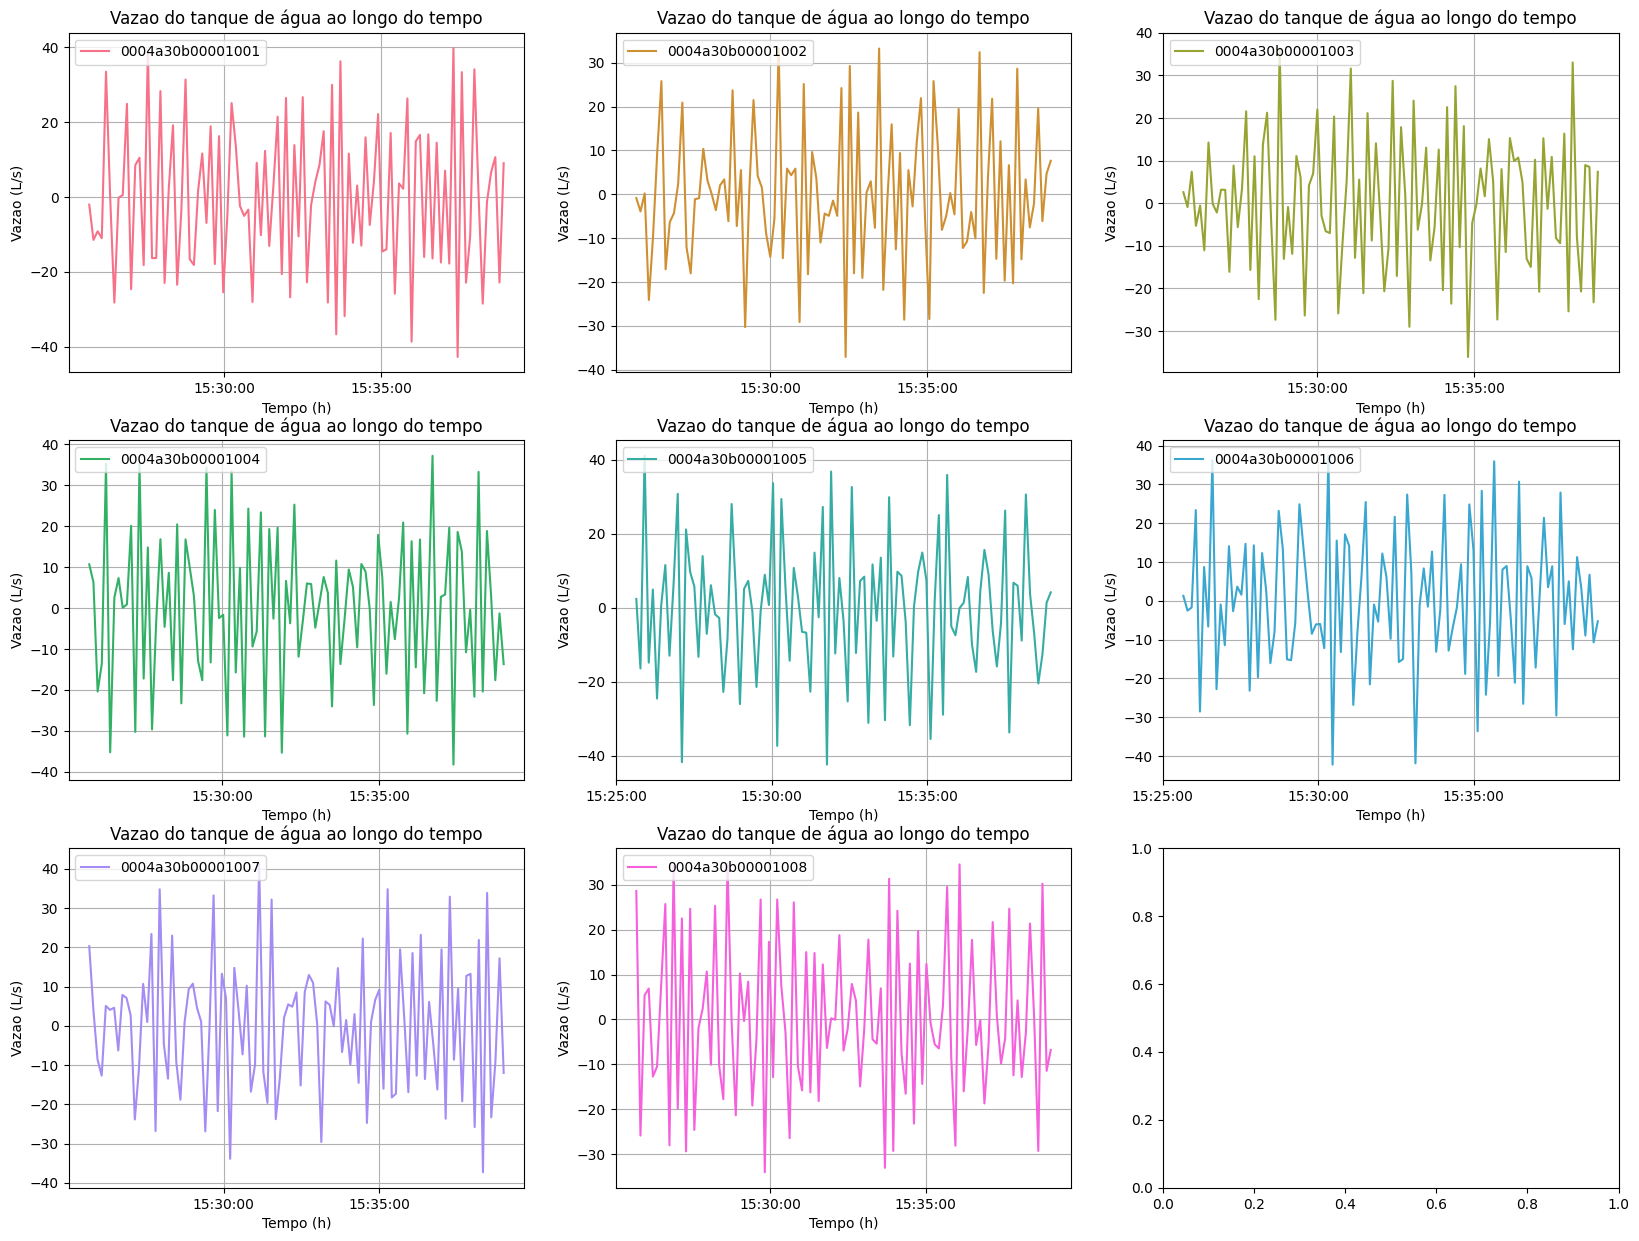

In [23]:
colors = sns.color_palette("husl", len(ids))

ncols = 3
nrows = (len(ids) + ncols - 1) // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, nrows*5))
axes = axes.flatten()
for ax, id in zip(axes,ids):
    df_water_tank_id = dfs_water_tank_per_node[id]
    sns.lineplot(ax=ax, x="time", y="Vazao", data=df_water_tank_id, label=id, color=colors.pop(0))
    ax.set_xlabel("Tempo (h)")
    ax.set_ylabel("Vazao (L/s)")
    ax.set_title("Vazao do tanque de água ao longo do tempo") 
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.grid(True)
st.pyplot(plt.gcf())

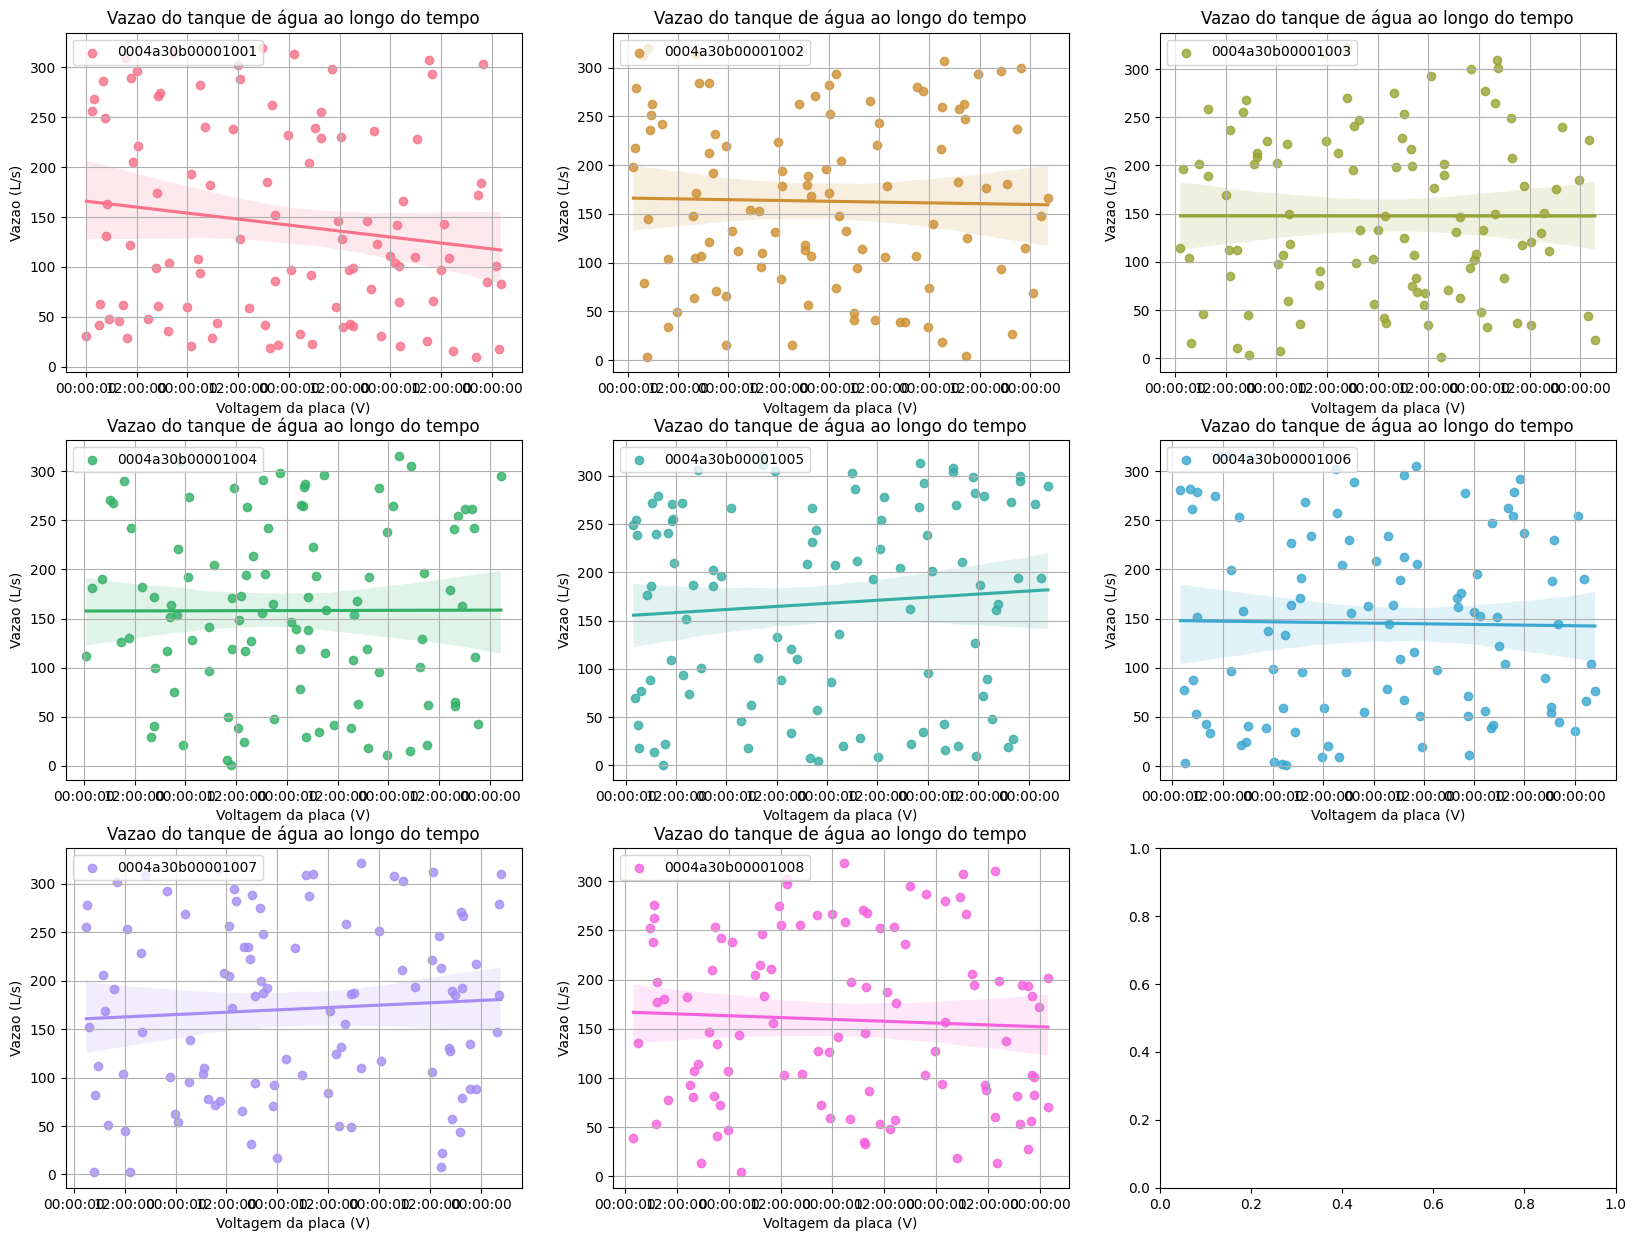

In [24]:
colors = sns.color_palette("husl", len(ids))

ncols = 3
nrows = (len(ids) + ncols - 1) // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, nrows*5))
axes = axes.flatten()
for ax, id in zip(axes,ids):
    df_water_tank_id = dfs_water_tank_per_node[id]
    sns.regplot(ax=ax, x="data_boardVoltage", y="Volume", data=df_water_tank_id, label=id, color=colors.pop(0))
    ax.set_xlabel("Voltagem da placa (V)")
    ax.set_ylabel("Vazao (L/s)")
    ax.set_title("Vazao do tanque de água ao longo do tempo") 
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.grid(True)
st.pyplot(plt.gcf())

In [32]:
for id in ids:
    print("Device ID: ", id)
    df_water_tank_id = dfs_water_tank_per_node[id]
    model = ols("Volume ~ data_boardVoltage", data=df_water_tank_id).fit()
    # get correlation variable ONLY DONT PRINT SUMMAR



Device ID:  0004a30b00001001


ValueError: could not convert string to float: 'SmartCampusMaua'